In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

In [ ]:
# 파일 읽어오기
df_activity_list = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/NetworkX/DSME_ACTIVITY_LIST.csv", encoding='utf-8')
df_relation_list = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/NetworkX/DSME_RELATION.csv", encoding='utf-8')

# ACTIVITYCODE를 인덱스로 설정
df_activity_list.set_index('ACTIVITYCODE', inplace = True)

# activity를 node로 가지는 그래프 생성
act_network = nx.DiGraph()
for idx, row in df_activity_list.iterrows():
    act_network.add_node(idx)
    for item, col in zip(row, df_activity_list.columns):
        act_network.nodes[idx][col] = item

# relation으로 edge 연결 (현재 node에 없는 activity가 있는 경우, node를 자동으로 생성함)
for idx, row in df_relation_list.iterrows():
    act_network.add_edge(row['PREVACTIVITYCODE'], row['NEXTACTIVITYCODE'])
    for item, col in zip(row, df_relation_list.columns):
        if col != 'PREVACTIVITYCODE' and col != 'NEXTACTIVITYCODE':
            act_network.edges[row['PREVACTIVITYCODE'], row['NEXTACTIVITYCODE']][col] = item

In [ ]:
# edge 개수 확인
act_network.number_of_edges()

2612

In [ ]:
# node 개수 확인
act_network.number_of_nodes()

3025

In [ ]:
# node 확인
act_network.nodes['P571BP00']

{' 작업장': '선행도장-상선-도장',
 'DESCRIPTION': '571 BLK B Stage 선행 도장',
 'LOCATIONCODE': '571',
 'LOCATIONTYPE': 'B',
 'PLANDURATION': 5,
 'PROJECTNO': 5466,
 '단위': 'M2',
 '물량': '561'}

In [ ]:
act_network.adj

AdjacencyView({'P571BP00': {'Z571ZBR0': {'PROJECTNO': 5466, 'LOCATIONCODE': '571', 'LAG': 1, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}}, 'W571GA00': {'Z571ZBI0': {'PROJECTNO': 5466, 'LOCATIONCODE': '571', 'LAG': 2, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}}, 'S634A000': {'C634CC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '634', 'LAG': -7, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W634GA00': {'PROJECTNO': 5466, 'LOCATIONCODE': '634', 'LAG': -4, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}, 'W634GC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '634', 'LAG': 4, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}}, 'C621CC00': {'C621CP00': {'PROJECTNO': 5466, 'LOCATIONCODE': '621', 'LAG': -1, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}}, 'S426A000': {'C426CC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '426', 'LAG': -7, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W426GA00': {'PROJECTNO': 5466, 'LOCATIONCODE': '426', 'LAG': -1, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}}, 'W225GC00': {}, 'S835A000': {'C835CC00

In [ ]:
act_network.edges

OutEdgeView([('P571BP00', 'Z571ZBR0'), ('W571GA00', 'Z571ZBI0'), ('S634A000', 'C634CC00'), ('S634A000', 'W634GA00'), ('S634A000', 'W634GC00'), ('C621CC00', 'C621CP00'), ('S426A000', 'C426CC00'), ('S426A000', 'W426GA00'), ('S835A000', 'C835CC00'), ('S835A000', 'W835GA00'), ('S835A000', 'W835GC00'), ('S626A000', 'C626CC00'), ('S626A000', 'W626GA00'), ('S626A000', 'W626GC00'), ('Z241ZBR0', 'E20KP241'), ('Z832ZBI0', 'P832BC00'), ('S294A000', 'C294CC00'), ('S294A000', 'W294GA00'), ('S294A000', 'W294GC00'), ('W293GA00', 'Z293ZBI0'), ('S293A000', 'C293CC00'), ('S293A000', 'W293GA00'), ('S293A000', 'W293GC00'), ('P293BP00', 'Z293ZBR0'), ('C627CC00', 'C627CP00'), ('Z627ZBR0', 'P627BP01'), ('Z627ZBR0', 'E62GP627'), ('W524GA00', 'Z524ZBI0'), ('P223BC00', 'P223BP00'), ('Z263ZBI0', 'P263BC00'), ('P239BC00', 'P239BP00'), ('P836BP00', 'Z836ZBR0'), ('W102GB00', 'U102GB00'), ('W102GB00', 'Z102ZBI0'), ('S542A000', 'C542CC00'), ('S542A000', 'W542GA00'), ('S542A000', 'W542GC00'), ('Z635ZBR0', 'P635BP01'),

In [ ]:
act_network.nodes

NodeView(('P571BP00', 'W571GA00', 'S634A000', 'C621CC00', 'S426A000', 'W225GC00', 'S835A000', 'S626A000', 'Z241ZBR0', 'Z832ZBI0', 'S294A000', 'W293GA00', 'S293A000', 'P293BP00', 'C627CC00', 'Z627ZBR0', 'C183CP00', 'W524GA00', 'P223BC00', 'C225CP00', 'Z263ZBI0', 'P239BC00', 'P836BP00', 'W102GB00', 'S542A000', 'Z635ZBR0', 'S113A000', 'C283CP00', 'S905A000', 'C633CP00', 'C154CP00', 'C152CP00', 'W836GA00', 'W144GC00', 'Z242ZBI0', 'P652BC00', 'P261BP00', 'S223A000', 'W651GA00', 'Z125ZBI0', 'W222GC00', 'P537BP00', 'Z627ZBI0', 'Z834ZBI0', 'U132GB00', 'U142GB00', 'S625A000', 'Z192ZBR0', 'T105O000', 'C231CC00', 'Z661ZBR0', 'Z235ZBR0', 'P731BP00', 'W633GA00', 'W153GS00', 'W552GA00', 'Z143ZBR0', 'Z134ZBR0', 'W923GB00', 'S225A000', 'S237A000', 'C751CP00', 'P142BC00', 'S206A000', 'S532A000', 'P523BP00', 'P206BP00', 'Z633ZBI0', 'S207A000', 'P544BC00', 'W823GS00', 'C171CP00', 'C621CP00', 'Z823ZBR0', 'P551BC00', 'C144CP00', 'C906CC00', 'S144A000', 'P542BC00', 'S106A000', 'P110BP00', 'P203BC00', 'W932G

In [ ]:
act_network.nodes['S113A000']

{' 작업장': '사외-조립-주)퍼시',
 'DESCRIPTION': '113 BLK B Stage 조립',
 'LOCATIONCODE': '113',
 'LOCATIONTYPE': 'B',
 'PLANDURATION': 32,
 'PROJECTNO': 5466,
 '단위': 'JL',
 '물량': '1131.7'}

In [ ]:
act_network['S113A000']

AtlasView({'C113CC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': -7, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W113GB00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': -2, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}, 'W113GC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': 0, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W113GS00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': 0, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}})

In [ ]:
act_network['S113A000']

AtlasView({'C113CC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': -7, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W113GB00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': -2, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'FS'}, 'W113GC00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': 0, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}, 'W113GS00': {'PROJECTNO': 5466, 'LOCATIONCODE': '113', 'LAG': 0, 'LOCATIONTYPE': 'B', 'RELATIONTYPE': 'SS'}})

In [ ]:
for i in range(1000):
    time.sleep(60)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


In [ ]:
# 모든 node의 in_degree 분포 확인을 위해 따로 pd.Series로 저장
list_in_degree = []
for act, in_degree in act_network.in_degree():
    list_in_degree.append(in_degree)
sr_in_degree = pd.Series(list_in_degree)

list_out_degree = []
for act, out_degree in act_network.out_degree():
    list_out_degree.append(out_degree)
sr_out_degree = pd.Series(list_out_degree)

In [ ]:
# in_degree 분포 확인
sr_in_degree.value_counts().sort_index()

0     649
1    2159
2     199
3      17
4       1
dtype: int64

In [ ]:
# out_degree 분포 확인
sr_out_degree.value_counts().sort_index()

0    1133
1    1531
2     147
3     127
4      36
5      45
6       5
7       1
dtype: int64

In [ ]:
# in_degree가 0인 (선행 작업이 정의되지 않은) activity들 출력
for act, in_degree in act_network.in_degree():
    if in_degree == 0:
        # print()
        print(act_network.nodes[act])
        # for u, v in act_network.in_edges(act):
        #     try:
        #         print(act_network.nodes[u])
        #     except:
        #         pass

{'PROJECTNO': 5466, 'LOCATIONCODE': '634', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '634 BLK B Stage 조립', 'PLANDURATION': 15, '물량': '2641', '단위': 'JL', ' 작업장': '조립1-PBS'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '426', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '426 BLK B Stage 조립', 'PLANDURATION': 9, '물량': '624.1', '단위': 'JL', ' 작업장': '조립3-상선-NPS'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '835', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '835 BLK B Stage 조립', 'PLANDURATION': 17, '물량': '1264.2', '단위': 'JL', ' 작업장': '조립3-상선-NPS'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '626', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '626 BLK B Stage 조립', 'PLANDURATION': 15, '물량': '3368.9', '단위': 'JL', ' 작업장': '조립1-PBS'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '294', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '294 BLK B Stage 조립', 'PLANDURATION': 18, '물량': '2185.1', '단위': 'JL', ' 작업장': '해양조립-조립-해양제작 1공장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '293', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '293 BLK B Stage 조립', 'PLANDURATION': 17, '물량': '1892.6', '단위': 'JL', 

In [ ]:
# out_degree가 0인 activity 출력
for act, out_degree in act_network.out_degree():
    if out_degree == 0:
        print(act_network.nodes[act])

{'PROJECTNO': 5466, 'LOCATIONCODE': '225', 'LOCATIONTYPE': 'B', 'DESCRIPTION': "225 BLK C Stage 중조 의장 ('C')", 'PLANDURATION': 13, '물량': '928.5', '단위': 'KG', ' 작업장': '조립의장-상선관철'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '183', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '183 BLK J Stage 절단 전처리', 'PLANDURATION': 19, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '225', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '225 BLK J Stage 절단 전처리', 'PLANDURATION': 20, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '283', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '283 BLK J Stage 절단 전처리', 'PLANDURATION': 16, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '633', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '633 BLK J Stage 절단 전처리', 'PLANDURATION': 14, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '154', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '154 BLK J Stage 절단 전처리', 'PLANDURATION': 27, '물량': '0', '단위': 

In [ ]:
# out_degree가 4인 activity, 해당 activity의 후행 공정 description 출력
for act, out_degree in act_network.out_degree():
    if out_degree == 4:
        print(act_network.in_degree(act), act_network.out_degree(act), act, act_network.nodes[act]['DESCRIPTION'])
        tempList = []
        for edge in act_network.out_edges(act):
            try:
                tempList.append(act_network.nodes[edge[1]]['DESCRIPTION'])
            except:
                pass
        print(tempList)

0 4 S113A000 113 BLK B Stage 조립
['113 BLK J Stage 절단', "113 BLK B Stage 의장 ('B')", "113 BLK C Stage 중조 의장 ('C')", "113 BLK S Stage 소조 의장 ('S')"]
0 4 S144A000 144 BLK B Stage 조립
['144 BLK J Stage 절단', "144 BLK B Stage 의장 ('B')", "144 BLK C Stage 중조 의장 ('C')", "144 BLK S Stage 소조 의장 ('S')"]
0 4 S106A000 106 BLK B Stage 조립
['106 BLK J Stage 절단', "106 BLK B Stage 의장 ('B')", "106 BLK C Stage 중조 의장 ('C')", "106 BLK S Stage 소조 의장 ('S')"]
0 4 S228A000 228 BLK B Stage 조립
['228 BLK J Stage 절단', "228 BLK A Stage 대조 의장 ('A')", "228 BLK C Stage 중조 의장 ('C')", "228 BLK S Stage 소조 의장 ('S')"]
0 4 S154A000 154 BLK B Stage 조립
['154 BLK J Stage 절단', "154 BLK B Stage 의장 ('B')", "154 BLK C Stage 중조 의장 ('C')", "154 BLK S Stage 소조 의장 ('S')"]
0 4 S825A000 825 BLK B Stage 조립
['825 BLK J Stage 절단', "825 BLK A Stage 대조 의장 ('A')", "825 BLK C Stage 중조 의장 ('C')", "825 BLK S Stage 소조 의장 ('S')"]
0 4 S836A000 836 BLK B Stage 조립
['836 BLK J Stage 절단', "836 BLK A Stage 대조 의장 ('A')", "836 BLK C Stage 중조 의장 ('C')", "836 BL

In [ ]:
for act, out_degree in act_network.out_degree():
    if out_degree == 6:
        print(act_network.nodes[act])
        print(act_network.in_degree(act))
        for u, v in act_network.in_edges(act):
            print(act_network.nodes[u])
            print(act_network.in_degree(u))
            for u2, v2 in act_network.in_edges(u):
                print(act_network.nodes[u2])

{'PROJECTNO': 5466, 'LOCATIONCODE': '13D', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE 기간', 'PLANDURATION': 12, '물량': '94.4', '단위': 'JL', ' 작업장': 'NO1'}
1
{'PROJECTNO': 5466, 'LOCATIONCODE': '13D', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE장 착수~탑재 공기', 'PLANDURATION': 18, '물량': '0', '단위': '-', ' 작업장': 'NO1'}
0
{'PROJECTNO': 5466, 'LOCATIONCODE': '12E', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE 기간', 'PLANDURATION': 16, '물량': '419.6', '단위': 'JL', ' 작업장': 'NO1'}
1
{'PROJECTNO': 5466, 'LOCATIONCODE': '12E', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE장 착수~탑재 공기', 'PLANDURATION': 23, '물량': '0', '단위': '-', ' 작업장': 'NO1'}
0
{'PROJECTNO': 5466, 'LOCATIONCODE': '10H', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE 기간', 'PLANDURATION': 18, '물량': '429.3', '단위': 'JL', ' 작업장': 'G01'}
1
{'PROJECTNO': 5466, 'LOCATIONCODE': '10H', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE장 착수~탑재 공기', 'PLANDURATION': 19, '물량': '0', '단위': '-', ' 작업장': 'G01'}
0
{'PROJECTNO': 5466, 'LOCATIONCODE': '10C', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE 

In [ ]:
# 끊어져 있는 subgraph들 개수 확인
nx.number_weakly_connected_components(act_network)

433

In [ ]:
# 끊어져 있는 subgraph들의 길이 분포를 보귀 위해 따로 pd.Series로 저장
count = 0
length = []
for subgraph in nx.weakly_connected_components(act_network):
    # if len(subgraph) == 1:
    #     count += 1
    # print(len(subgraph))
    length.append(len(subgraph))
sr_length = pd.Series(length)

In [ ]:
sr_length.sum()

3025

In [ ]:
sr_length.describe()

count    433.000000
mean       6.986143
std       30.006092
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      568.000000
dtype: float64

In [ ]:
# 전체 subgraph 중 1개로 끊어져 있는 subgraph 제외한 개수
433-298

135

In [ ]:
sr_length.value_counts().sort_index()

1      298
3       63
4        7
5        2
6        2
7        2
8        4
10       1
11       1
20      12
21       2
22       2
24       3
25       1
26       5
27       6
28       1
32       1
35       3
39       1
40       1
47       1
48       1
49       1
50       1
52       1
53       1
56       1
59       1
62       1
80       2
82       1
84       1
92       1
568      1
dtype: int64

In [ ]:
for edge in act_network.in_edges('E20LD20L'):
    print(edge[0])

Z20LZPR0
E20KD20K


In [ ]:
# 568개 노드가 있는 subgraph에서, 탑재공정에 해당하는 activity와 해당 공정의 선행공정 activity code 및 description 출력
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 568:
        for n in subgraph:
            try:
                if '탑재' == act_network.nodes[n]['DESCRIPTION'][-2:]:
                    print(act_network.in_degree(n), act_network.out_degree(n), n, act_network.nodes[n])
                    for edge in act_network.in_edges(n):
                        print(edge[0], act_network.nodes[edge[0]]['DESCRIPTION'])
                    print()
            except:
                pass

3 1 E50GD50G {'PROJECTNO': 5466, 'LOCATIONCODE': '50G', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '50G-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
E50GPM00 50G BLK P Stage PE 사주사상
E50FD50F 50F-탑재
E63GD63G 63G-탑재

2 2 E23AD23A {'PROJECTNO': 5466, 'LOCATIONCODE': '23A', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '23A-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
Z23AZPR0 23A BLK P Stage 발판 해체
E22AD22A 22A-탑재

3 1 E62GD62G {'PROJECTNO': 5466, 'LOCATIONCODE': '62G', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '62G-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
Z62GZPR0 62G BLK P Stage 발판 해체
E63FD63F 63F-탑재
E737D737 737-탑재

2 1 E728D728 {'PROJECTNO': 5466, 'LOCATIONCODE': '728', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '728-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
W728GA00 728 BLK A Stage 대조 의장 ('A')
E208D208 208-탑재

2 1 E62CD62C {'PROJECTNO': 5466, 'LOCATIONCODE': '62

In [ ]:
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) != 568:
        for n in subgraph:
            try:
                if 'Seq Act' == act_network.nodes[n]['DESCRIPTION'][-7:]:
                    print(act_network.out_degree(n), n, act_network.nodes[n])
                    if act_network.out_degree(n) == 1:
                        # 
                        for u, v in act_network.out_edges(n):
                            print(act_network.nodes[v]['DESCRIPTION'])
            except:
                pass

0 E50GP571 {'PROJECTNO': 5466, 'LOCATIONCODE': '50G', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '50G-571 PE Seq Act', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
1 E50GP561 {'PROJECTNO': 5466, 'LOCATIONCODE': '50G', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '50G-561 PE Seq Act', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
50G-571 PE Seq Act
1 E50GP527 {'PROJECTNO': 5466, 'LOCATIONCODE': '50G', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '50G-527 PE Seq Act', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
50G-537 PE Seq Act
1 E50GP537 {'PROJECTNO': 5466, 'LOCATIONCODE': '50G', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '50G-537 PE Seq Act', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
50G-561 PE Seq Act
1 E63DP634 {'PROJECTNO': 5466, 'LOCATIONCODE': '63D', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '63D-634 PE Seq Act', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'

In [ ]:
# 568개가 연결된 subgraph에서 out_degree가 0인 activity들 출력
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 568:
        for n in subgraph:
            try:
                if act_network.out_degree(n) == 0:
                    print(act_network.in_degree(n), act_network.out_degree(n), n, act_network.nodes[n])                    
            except:
                pass

1 0 E11HPG00 {'PROJECTNO': 5466, 'LOCATIONCODE': '11H', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '11H BLK P Stage PE 취부/용접', 'PLANDURATION': 14, '물량': '324.2', '단위': 'JL', ' 작업장': '해양탑재-해양조립-P-E-취부/용접'}
1 0 E80CPG00 {'PROJECTNO': 5466, 'LOCATIONCODE': '80C', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '80C BLK P Stage PE 취부/용접', 'PLANDURATION': 13, '물량': '494.1', '단위': 'JL', ' 작업장': '탑재1-P-E 취부/용접'}
1 0 C728CP00 {'PROJECTNO': 5466, 'LOCATIONCODE': '728', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '728 BLK J Stage 절단 전처리', 'PLANDURATION': 14, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
1 0 E63APG00 {'PROJECTNO': 5466, 'LOCATIONCODE': '63A', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '63A BLK P Stage PE 취부/용접', 'PLANDURATION': 9, '물량': '64.1', '단위': 'JL', ' 작업장': '탑재1-P-E 취부/용접'}
1 0 A20JO000 {'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE장 점유 공기', 'PLANDURATION': 28, '물량': '0', '단위': '-', ' 작업장': 'NPE'}
1 0 Z50FZPI0 {'PROJECTNO': 5466, 'LOCATIONCODE': '50F', 'LOCATIONTYPE': 'P'

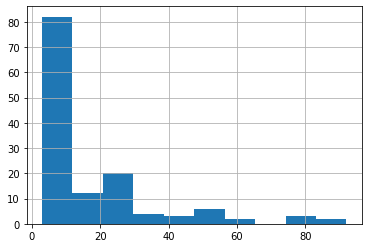

In [ ]:
sr_temp = sr_length
sr_temp = sr_temp.drop(sr_length[sr_length == 1].index)
sr_temp = sr_temp.drop(sr_length[sr_length == 568].index)
sr_temp.hist()

In [ ]:
# 1개씩 끊어져 있는 activity 출력
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 1:
        print(act_network.nodes[subgraph.pop()])

{'PROJECTNO': 5466, 'LOCATIONCODE': '105', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B105 AUX MACH. INST', 'PLANDURATION': 4, '물량': '2', '단위': '장비S', ' 작업장': '기계의장-후행의장-상선-보기'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '10F', 'LOCATIONTYPE': 'E', 'DESCRIPTION': '10F BLK D Stage 탑재 취부/용접(선실)', 'PLANDURATION': 12, '물량': '188.5', '단위': 'JL', ' 작업장': '탑재1-탑재 취부/용접'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '105', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B105 OUTFITTING', 'PLANDURATION': 4, '물량': '2111.725', '단위': 'KG', ' 작업장': '의장1-후행의장-상선 기장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '106', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B106 INSUL. INST', 'PLANDURATION': 4, '물량': '224.9', '단위': 'KG', ' 작업장': '의장1-선실-후행의장-기장 보온'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '80A', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B80A ELEC.HOT WORK', 'PLANDURATION': 17, '물량': '1', '단위': 'LOT', ' 작업장': '의장1-후행의장-상선 전장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '10F', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B10F EQUIP INST/CONN(ACC.)', 'PLANDURATION': 9, 

{'S107A000', 'W107GB00', 'Z107ZBI0', 'C107CP00', 'C107CC00', 'Z107ZBR0', 'P107BC00', 'W107GS00', 'P107BP00', 'U107GB00'}


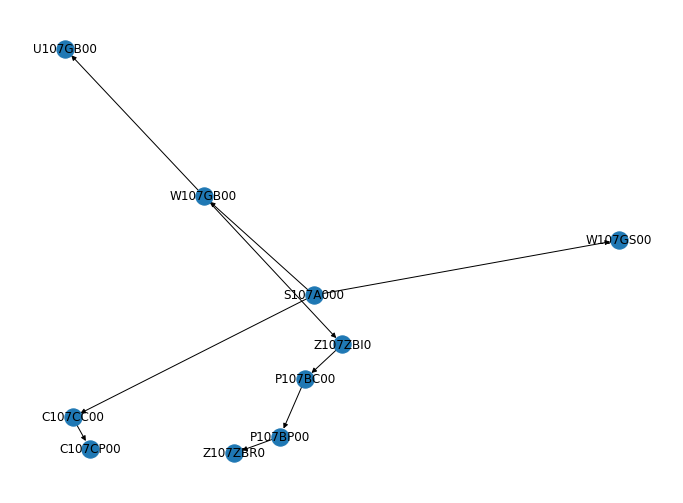

In [ ]:
# 10개가 포함된 subgraph 그래프 출력
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 10:
        fig, ax = plt.subplots(figsize=(12,9))
        nx.draw(act_network.subgraph(subgraph), with_labels = True)
        print(subgraph)

{'S107A000', 'W107GB00', 'Z107ZBI0', 'C107CP00', 'C107CC00', 'Z107ZBR0', 'P107BC00', 'W107GS00', 'P107BP00', 'U107GB00'}


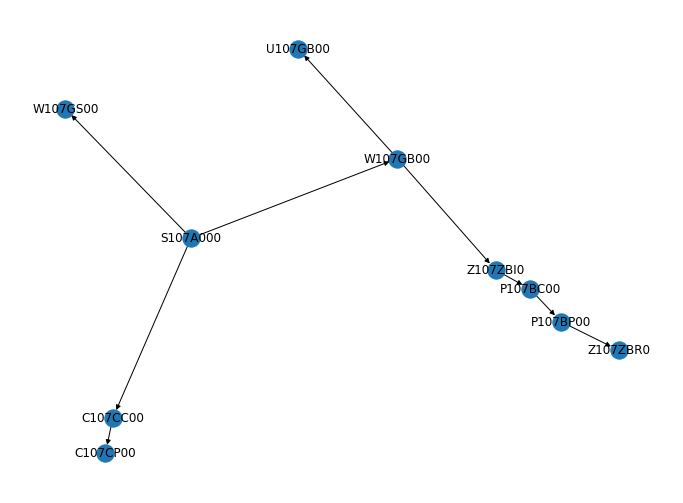

In [ ]:
temp_nodes = []
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 10:
        fig, ax = plt.subplots(figsize=(12,9))
        nx.draw(act_network.subgraph(subgraph), with_labels = True)
        print(subgraph)
        for n in subgraph:
            temp_nodes.append(n)

In [ ]:
for n in temp_nodes:
    print(act_network.in_degree(n), act_network.out_degree(n), n, act_network.out_edges(n))

1 0 W107GS00 []
1 0 U107GB00 []
1 2 W107GB00 [('W107GB00', 'U107GB00'), ('W107GB00', 'Z107ZBI0')]
1 1 P107BP00 [('P107BP00', 'Z107ZBR0')]
1 0 Z107ZBR0 []
0 3 S107A000 [('S107A000', 'C107CC00'), ('S107A000', 'W107GS00'), ('S107A000', 'W107GB00')]
1 1 C107CC00 [('C107CC00', 'C107CP00')]
1 0 C107CP00 []
1 1 P107BC00 [('P107BC00', 'P107BP00')]
1 1 Z107ZBI0 [('Z107ZBI0', 'P107BC00')]


In [ ]:
node_list = []
for n in nx.topological_sort(tempGraph):
    print(n)

S107A000
W107GB00
Z107ZBI0
P107BC00
P107BP00
Z107ZBR0
U107GB00
W107GS00
C107CC00
C107CP00


In [ ]:
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 10:
        for n in subgraph:
            print(n, act_network.nodes[n])

P107BC00 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '107 BLK B Stage 선행 도장 전처리', 'PLANDURATION': 1, '물량': '330.28', '단위': 'M2', ' 작업장': '선행도장-상선-전처리'}
Z107ZBR0 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '107 BLK B Stage 발판 해체', 'PLANDURATION': 1, '물량': '21', '단위': '매', ' 작업장': '발판지원-상선 일반발판'}
Z107ZBI0 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '107 BLK B Stage 발판 설치', 'PLANDURATION': 1, '물량': '21', '단위': '매', ' 작업장': '발판지원-상선 일반발판'}
S107A000 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '107 BLK B Stage 조립', 'PLANDURATION': 10, '물량': '300.3', '단위': 'JL', ' 작업장': '조립3-상선-NPS'}
C107CP00 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '107 BLK J Stage 절단 전처리', 'PLANDURATION': 9, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
W107GB00 {'PROJECTNO': 5466, 'LOCATIONCODE': '107', 'LOCATIONTYPE': 'B', 'DESCRIPTION': "107 BLK B

{'Z63CZPR0', 'T20MO000', 'E91AD91A', 'E62FPS00', 'E727D727', 'P80APP00', 'Z63FZPI0', 'P12DPP00', 'F/S', 'W737GA00', 'E50APS00', 'E13EPS00', 'Z62GZPR0', 'E20MPG00', 'C727CC00', 'P104BP00', 'E208D208', 'Z50HZPI0', 'Z62HZPR0', 'P104BC00', 'Z62CZPI0', 'C632CC00', 'E91APM00', 'E50HPS00', 'T62EO000', 'P50BPP00', 'E63CPS00', 'E63APS00', 'C205CP00', 'W726GA00', 'A107O000', 'Z11AZPI0', 'W723GA00', 'A12EO000', 'C203CP00', 'E104D104', 'P205BC00', 'E50BPS00', 'W20LOP00', 'A50HO000', 'T20JO000', 'W23BOP00', 'P20NPP00', 'P13EPP00', 'E20NPG00', 'U13DGP00', 'Z63AZPR0', 'S208A000', 'S736A000', 'Z63EZPI0', 'E50GPM00', 'Z80CZPR0', 'E107D107', 'E50DD50D', 'Z80CZPI0', 'E63CD63C', 'A62EO000', 'P207BC00', 'E62GPG00', 'Z13EZPR0', 'Z50CZPR0', 'C725CC00', 'E20JPS00', 'A62DO000', 'E50EPM00', 'Z104ZBR0', 'M/E', 'Z80BZPR0', 'C733CC00', 'W208GC00', 'E998D998', 'Z20KZPI0', 'C104CC00', 'E63AD63A', 'E62HPS00', 'Z80DZPR0', 'A50AO000', 'Z80AZPR0', 'E20MPS00', 'E22BPG00', 'S203A000', 'E62EPS00', 'E22BP000', 'W20JOP00', '

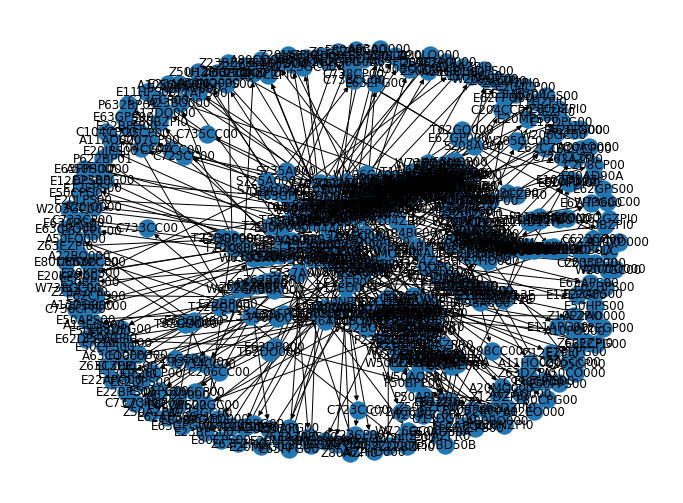

In [ ]:
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 568:
        fig, ax = plt.subplots(figsize=(12,9))
        nx.draw(act_network.subgraph(subgraph), with_labels = True)
        print(subgraph)

In [ ]:
for subgraph in nx.weakly_connected_components(act_network):
    if len(subgraph) == 568:
        tempGraph2 = act_network.subgraph(subgraph)
for n in tempGraph2:
    print(tempGraph2.in_degree(n), tempGraph2.out_degree(n), n, tempGraph2.nodes[n])

1 1 Z63CZPR0 {'PROJECTNO': 5466, 'LOCATIONCODE': '63C', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '63C BLK P Stage 발판 해체', 'PLANDURATION': 1, '물량': '99.3', '단위': '매', ' 작업장': '발판지원-상선 일반발판'}
0 1 T20MO000 {'PROJECTNO': 5466, 'LOCATIONCODE': '20M', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE장 착수~탑재 공기', 'PLANDURATION': 25, '물량': '0', '단위': '-', ' 작업장': 'NO1'}
2 1 E91AD91A {'PROJECTNO': 5466, 'LOCATIONCODE': '91A', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '91A-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
1 0 E62FPS00 {'PROJECTNO': 5466, 'LOCATIONCODE': '62F', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '62F BLK P Stage PE 심출', 'PLANDURATION': 8, '물량': '0', '단위': 'JL', ' 작업장': '탑재1-P-E 심출'}
2 1 E727D727 {'PROJECTNO': 5466, 'LOCATIONCODE': '727', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '727-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
1 1 P80APP00 {'PROJECTNO': 5466, 'LOCATIONCODE': '80A', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '80A BLK P Stage PE

{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'E', 'DESCRIPTION': '20J BLK D Stage 탑재 발판 설치', 'PLANDURATION': 1, '물량': '699', '단위': '매', ' 작업장': '발판지원-상선 일반발판'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'E', 'DESCRIPTION': '20J BLK D Stage 탑재 심출', 'PLANDURATION': 5, '물량': '0', '단위': 'JL', ' 작업장': '탑재1-탑재 심출'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'E', 'DESCRIPTION': '20J BLK D Stage 탑재 취부/용접', 'PLANDURATION': 11, '물량': '771.5', '단위': 'JL', ' 작업장': '탑재1-탑재 취부/용접'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'O', 'DESCRIPTION': 'B20J GENERAL OUTFITTING', 'PLANDURATION': 22, '물량': '8', '단위': 'KG', ' 작업장': '의장1-후행의장-상선 선장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'P', 'DESCRIPTION': '20J BLK P Stage 발판 해체', 'PLANDURATION': 1, '물량': '314.3', '단위': '매', ' 작업장': '발판지원-상선 일반발판'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '20J', 'LOCATIONTYPE': 'P', 'DESCRIPTION': 'PE 기간', 'PLANDURATION': 22, '물량': '570.2', '단위': 'JL'

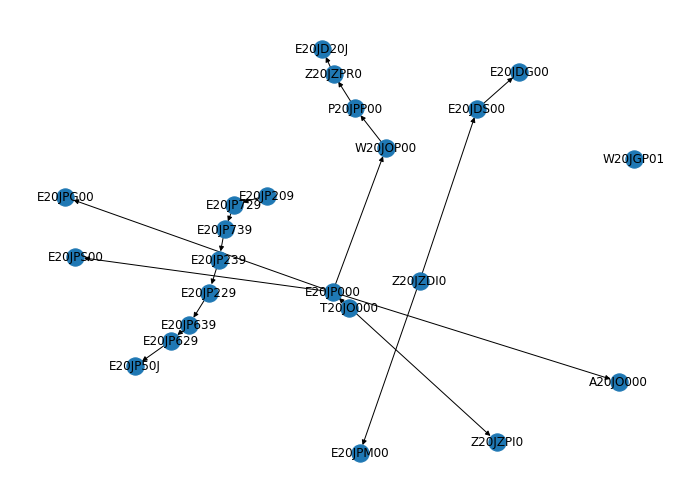

In [ ]:
# 20J 블록의 activity들 리스트에 따로 저장
list_temp_nodes = []
for node in act_network.nodes():
    try:
        if act_network.nodes[node]['LOCATIONCODE'] == '20J':
            list_temp_nodes.append(node)
            print(act_network.nodes[node])
    except:
        pass

# 해당 리스트의 노드들을 가지는 subgraph 저장 후 출력
fig, ax = plt.subplots(figsize=(12,9))
nx.draw(act_network.subgraph(list_temp_nodes), with_labels = True)


C723CP00 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '723 BLK J Stage 절단 전처리', 'PLANDURATION': 14, '물량': '0', '단위': 'TON', ' 작업장': '가공-상선-전처리'}
S723A000 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '723 BLK B Stage 조립', 'PLANDURATION': 15, '물량': '2303.5', '단위': 'JL', ' 작업장': '조립1-PBS'}
C723CC00 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '723 BLK J Stage 절단', 'PLANDURATION': 14, '물량': '227.1', '단위': 'TON', ' 작업장': '가공-상선-절단'}
W723GA00 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'B', 'DESCRIPTION': "723 BLK A Stage 대조 의장 ('A')", 'PLANDURATION': 13, '물량': '1177.3', '단위': 'KG', ' 작업장': '조립의장-상선관철'}
W723GC00 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'B', 'DESCRIPTION': "723 BLK C Stage 중조 의장 ('C')", 'PLANDURATION': 7, '물량': '1053.8', '단위': 'KG', ' 작업장': '조립의장-상선관철'}
E723DS00 {'PROJECTNO': 5466, 'LOCATIONCODE': '723', 'LOCATIONTYPE': 'E', 'DESCRIPTION': '72

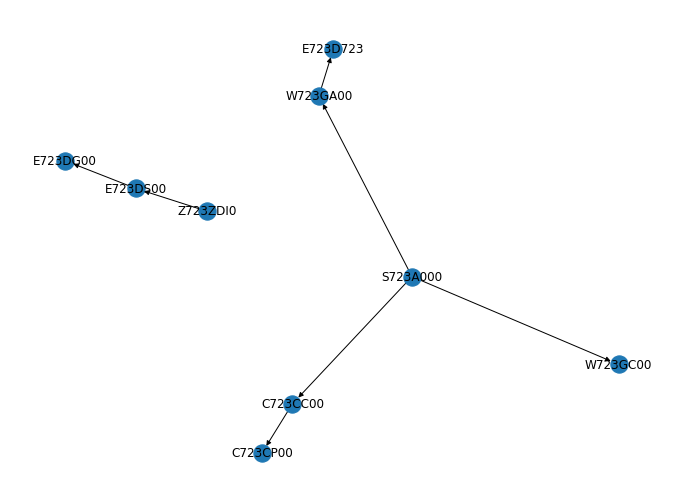

In [ ]:
list_temp_nodes = []
for node in act_network.nodes():
    try:
        if act_network.nodes[node]['LOCATIONCODE'] == '723':
            list_temp_nodes.append(node)
            print(node, act_network.nodes[node])
    except:
        pass

fig, ax = plt.subplots(figsize=(12,9))
nx.draw(act_network.subgraph(list_temp_nodes), with_labels = True)


In [ ]:
# description에 '도장'을 가지고 있는 activity 출력
for node in act_network.nodes():
    try:
        if '도장' in act_network.nodes[node]['DESCRIPTION']:
            print(act_network.nodes[node])
    except:
        pass

{'PROJECTNO': 5466, 'LOCATIONCODE': '571', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '571 BLK B Stage 선행 도장', 'PLANDURATION': 5, '물량': '561', '단위': 'M2', ' 작업장': '선행도장-상선-도장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '293', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '293 BLK B Stage 선행 도장', 'PLANDURATION': 7, '물량': '4202.2', '단위': 'M2', ' 작업장': '선행도장-상선-도장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '223', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '223 BLK B Stage 선행 도장 전처리', 'PLANDURATION': 1, '물량': '2373.8', '단위': 'M2', ' 작업장': '선행도장-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '239', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '239 BLK B Stage 선행 도장 전처리', 'PLANDURATION': 1, '물량': '5841.58', '단위': 'M2', ' 작업장': '선행도장-상선-전처리'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '836', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '836 BLK B Stage 선행 도장', 'PLANDURATION': 6, '물량': '2148.2', '단위': 'M2', ' 작업장': '선행도장-상선-도장'}
{'PROJECTNO': 5466, 'LOCATIONCODE': '652', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '652 BLK B Stage 선행 도장 전처리', 'PLANDURATION': 1, 

In [ ]:
# 한 activity에서 다른 activity로 연결되는 최단 node 경로 출력
nx.shortest_path(act_network, 'S723A000', 'E723D723')

['S723A000', 'W723GA00', 'E723D723']

In [ ]:
for n in nx.shortest_path(act_network, 'S204A000', 'E20MD20M'):
    print(act_network.in_degree(n), act_network.out_degree(n), n, act_network.nodes[n])

0 3 S204A000 {'PROJECTNO': 5466, 'LOCATIONCODE': '204', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '204 BLK B Stage 조립', 'PLANDURATION': 14, '물량': '2822.1', '단위': 'JL', ' 작업장': '조립1-PBS'}
1 1 W204GA00 {'PROJECTNO': 5466, 'LOCATIONCODE': '204', 'LOCATIONTYPE': 'B', 'DESCRIPTION': "204 BLK A Stage 대조 의장 ('A')", 'PLANDURATION': 9, '물량': '733.7', '단위': 'KG', ' 작업장': '조립의장-상선관철'}
1 1 P204BC00 {'PROJECTNO': 5466, 'LOCATIONCODE': '204', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '204 BLK B Stage 선행 도장 전처리', 'PLANDURATION': 1, '물량': '5756.54', '단위': 'M2', ' 작업장': '선행도장-상선-전처리'}
1 1 P204BP00 {'PROJECTNO': 5466, 'LOCATIONCODE': '204', 'LOCATIONTYPE': 'B', 'DESCRIPTION': '204 BLK B Stage 선행 도장', 'PLANDURATION': 6, '물량': '7686.3', '단위': 'M2', ' 작업장': '선행도장-상선-도장'}
2 2 E204D204 {'PROJECTNO': 5466, 'LOCATIONCODE': '204', 'LOCATIONTYPE': 'D', 'DESCRIPTION': '204-탑재', 'PLANDURATION': 1, '물량': '-', '단위': '-', ' 작업장': 'No.1 Dock Goaliath Crane'}
2 2 E205D205 {'PROJECTNO': 5466, 'LOCATIONCODE': '205', 'LOCATIONTYPE': 

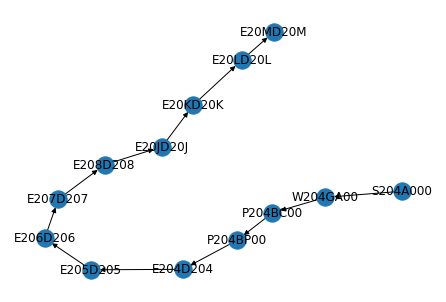

In [ ]:
nx.draw(act_network.subgraph(nx.shortest_path(act_network, 'S204A000', 'E20MD20M')), with_labels = True)
